In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Exercise 1

In [38]:
def run1():
    #generate synthetic data
    n=1
    mu = 2
    std = 2 
    x_obs = np.random.normal(loc=mu,scale=std,size=(n))

    #we want to the following hypothesis
    #H_0: 2 * mu - 4 = 0 vs H_1:2 * mu - 4 = 0  
    # T = 2 * x - 4 
    # T ~ N(2mu  -4, 2^2 * sigmoi^2)
    
    #test-statistic
    T_obs =  2 * x_obs - 4
    abs_T_obs = np.abs(T_obs)
    
    # (2**2) * (2**2)
    scale = np.sqrt(16) 
    
    #compute p-value
    p_value = 2 * (1- norm.cdf(abs_T_obs,loc=0, scale=scale))
    # print(p_value)
    

    return p_value



Count:  473
FPR:  0.0473


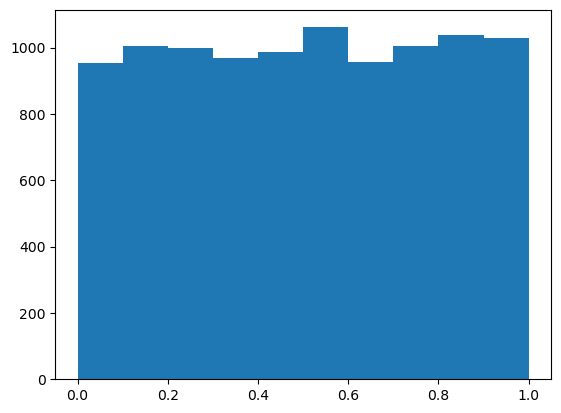

In [39]:
def test1():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run1()
    list_p_value.append(p_value)

    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test1()

# Exercise 2

In [28]:
n=10 
mu=0 
std = 4 #standard deviation (xich ma) - độ lệch chuẩn

x_obs = np.random.normal(loc=mu,scale=std,size=(n))
x_obs

array([  4.06095164, -12.26791776,  -2.65571103,  -4.19357235,
         1.52662565,   0.36005462,  -4.25846111,  -3.93205481,
         2.3867245 ,  -1.1439348 ])

In [63]:
def run2():
    #generate synthetic data
    n=10 
    mu=1
    std = 4 #standard deviation (xich ma) - độ lệch chuẩn

    x_obs = np.random.normal(loc=mu,scale=std,size=(n))

    #we want to the following hypothesis
    #H_0: 2(trung binh mu) - 1 = 0 vs H_1: 2(trung binh mu) - 1 != 0
    
    # T = 2 * TBC(xi) - 2
    T_obs = 2 * np.mean(x_obs) - 2
    # T ~ N(2/n * (Tổng ui chay i-> N) -2, (2/n)^2 * (Tổng i-> n với sigm^2) )
    
    
    scale =  np.sqrt(((2/n)**2) * (4 * n))  
    # variance còn scale phải lấy std = Căn bậc 2. 

    #compute p-value
    cdf = norm.cdf(T_obs, loc=0, scale=scale)
    p_value = 2 * min(cdf, 1 - cdf)

    return p_value

# run2()

Count:  3264
FPR:  0.3264


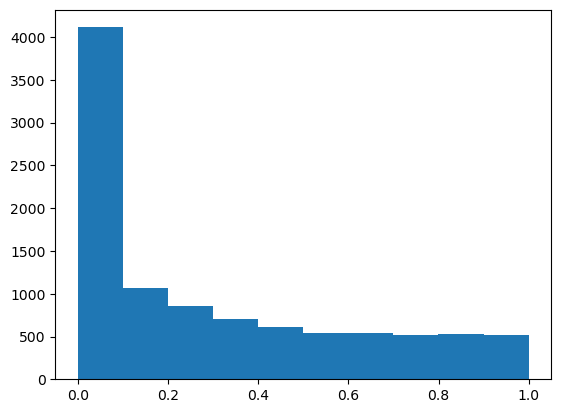

In [64]:
def test2():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run2()
    list_p_value.append(p_value)
    # print(p_value)
    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test2()

## Exercise 3

In [67]:
def run_3():
    #generate synthetic data
    n = 100
    m = 200 
    mu = 3
    std = 2 
    x_obs_1 = np.random.normal(loc=mu,scale=std,size=(n)) # x
    x_obs_2 = np.random.normal(loc=mu,scale=std,size=(m))  # y

    #we want to the following hypothesis
    #H_0: TBC (mu_x)=TBC mu_y vs TBC (mu_x) !=TBC mu_y
    # TBC:  Trung binh cong 
    
    # Test statistic
    # T_obs = TBC (mu_x) - TBC (mu_y)
    # T ~ N(TBC (x) - TBC (x), 1/n^2 (Tong i-> n sigma ^ 2 ) + 1/n^2 (Tong i-> m sigma ^ 2 ))
    T_obs = np.mean(x_obs_1) - np.mean(x_obs_2)
    
    # Scale = cang (1/100 ^ 2 * (2*100) + 1/ 200^2 * (2 * 200) ) = căn (0.03)
    
    scale =  np.sqrt(0.03) 
    # Số 2 là variance còn scale phải lấy std = Căn bậc 2. 

    #compute p-value
    cdf = norm.cdf(T_obs, loc=0, scale=scale)
    p_value = 2 * min(cdf, 1 - cdf)

    return p_value

Count:  1633
FPR:  0.1633


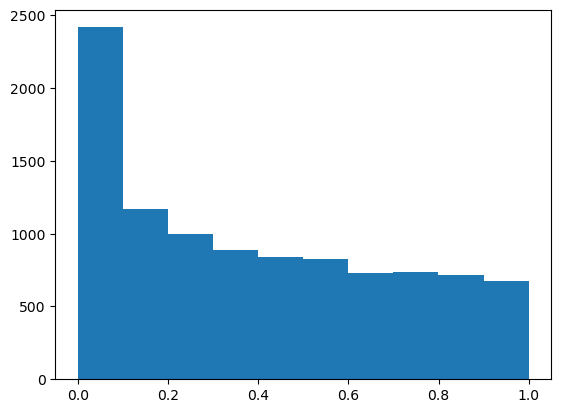

In [68]:
def test3():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run_3()
    list_p_value.append(p_value)
    # print(p_value)
    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test3()